In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

<h1>I. Data importing and cleaning 

In [2]:
#Importing dataset
df = pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

<h2>1. Remove duplicates

In [4]:
#Checking if any duplicated values in dataset 
df.duplicated().sum()

0

<h2>2. Missing value

In [5]:
#Checking if any missing values in dataset 
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

- Missing values take a small proportion(~1%) and are distributed randomly so I remove all of that. 

In [6]:
df.dropna(inplace=True)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


<h2>3. Outliers

In [7]:
#New dataframe with only numerical value
newdf = df.select_dtypes(include='number')

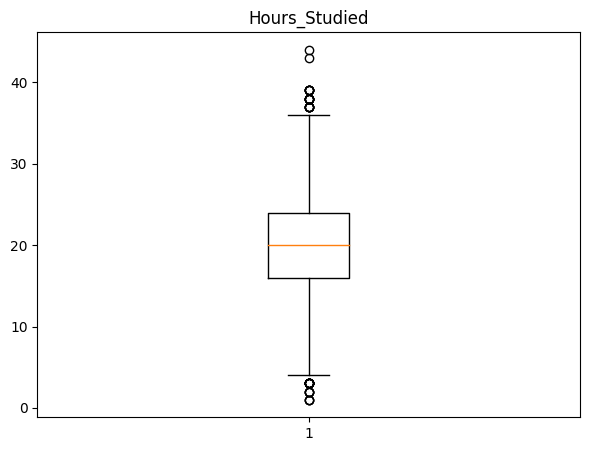

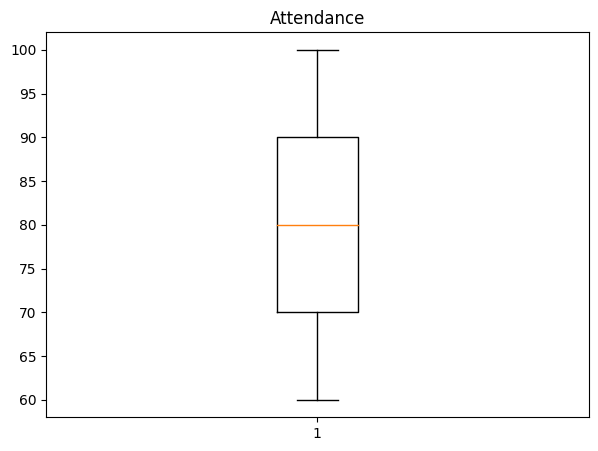

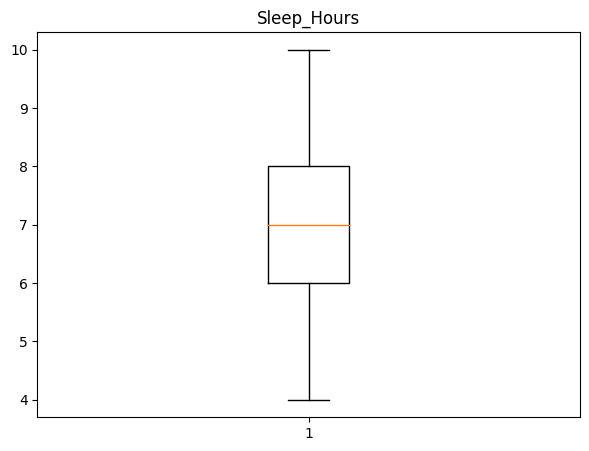

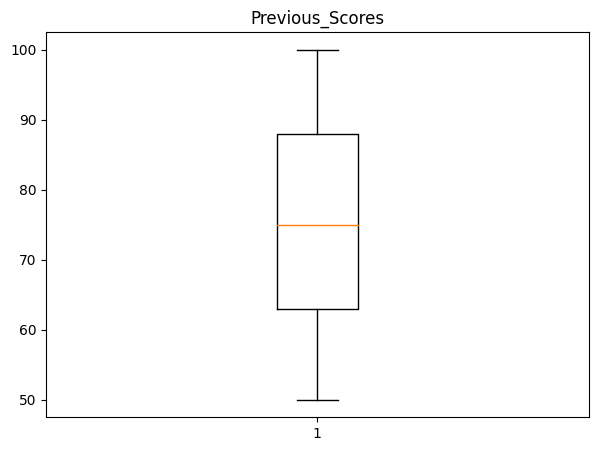

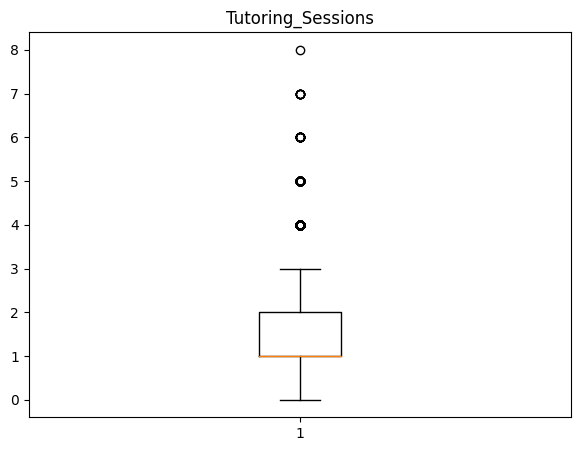

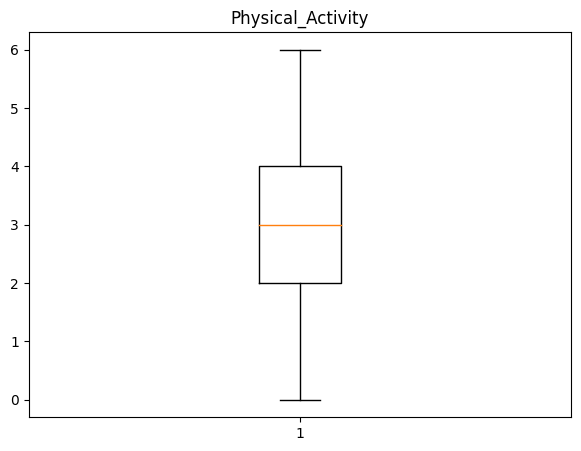

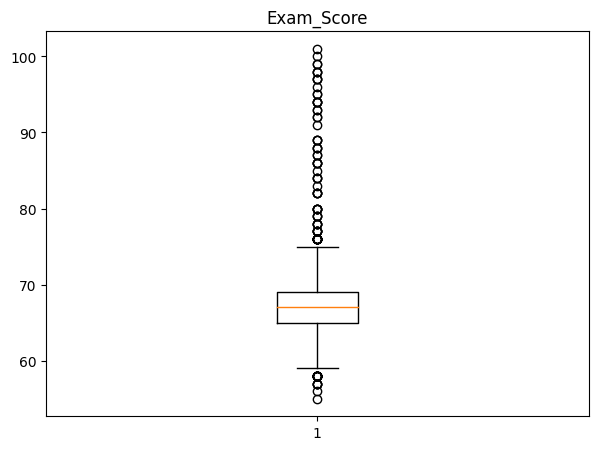

In [8]:
#Checking if any outliers in dataset by using Boxplot 
for i in newdf.columns:
    fig = plt.figure(figsize =(7, 5))
    plt.boxplot(newdf[i])
    plt.title(i)

plt.show()

- There are outliers in some attributes ('Hour_Studied', 'Tutoring_Session', 'Exam_Score'). But I'm not sure what caused these outliers, so I haven't deleted them yet. In the next steps, I will analyze in detail to see if these outliers are in the data range and then decide whether to keep or delete them.

<h2>4. Inconsistent and irrelevant data

- I will go through the distribution and statistics of all attributes to see if any inconsistent or irrelevant data

<h3>4.1. Hours_Studied (Numeric variable)

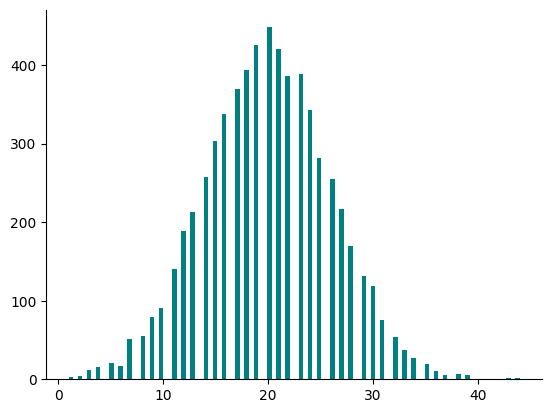

In [9]:
#Visualizing the distribution of Hour_Studied
fig, ax = plt.subplots()

ax.hist(df['Hours_Studied'], bins=100, color='teal')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [10]:
distinct = df['Hours_Studied'].nunique()
zeros = df[df['Hours_Studied'] == 0]['Hours_Studied'].count()
negative = df[df['Hours_Studied'] < 0]['Hours_Studied'].count()
sum = df['Hours_Studied'].sum()
kurtosis = df['Hours_Studied'].kurtosis()
skewness  = df['Hours_Studied'].skew()
variance = df['Hours_Studied'].var()
print(f'Distinct: {distinct} Zeros: {zeros}  Negative {negative} Sum: {sum}  Kurtosis: {kurtosis}  Skewness: {skewness}  Variance: {variance}')

df['Hours_Studied'].describe()

Distinct: 41 Zeros: 0  Negative 0 Sum: 127414  Kurtosis: 0.006554000531401982  Skewness: 0.016224630345704642  Variance: 35.82572649937036


count    6378.000000
mean       19.977109
std         5.985460
min         1.000000
25%        16.000000
50%        20.000000
75%        24.000000
max        44.000000
Name: Hours_Studied, dtype: float64

<h3>4.2. Attendance (Numeric variable)

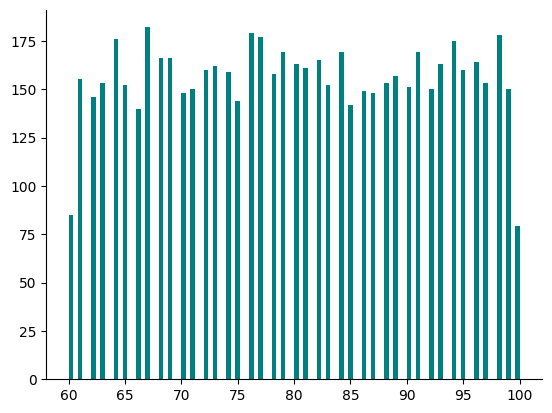

In [11]:
#Visualizing the distribution of Attendance
fig, ax = plt.subplots()

ax.hist(df['Attendance'], bins=100, color='teal')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [12]:
distinct = df['Attendance'].nunique()
zeros = df[df['Attendance'] == 0]['Attendance'].count()
negative = df[df['Attendance'] < 0]['Attendance'].count()
sum = df['Attendance'].sum()
kurtosis = df['Attendance'].kurtosis()
skewness  = df['Attendance'].skew()
variance = df['Attendance'].var()
print(f'Distinct: {distinct} Zeros: {zeros}  Negative {negative} Sum: {sum}  Kurtosis: {kurtosis}  Skewness: {skewness}  Variance: {variance}')

df['Attendance'].describe()

Distinct: 41 Zeros: 0  Negative 0 Sum: 510373  Kurtosis: -1.1958142510825538  Skewness: 0.005662718901984047  Variance: 133.41919814333545


count    6378.000000
mean       80.020853
std        11.550723
min        60.000000
25%        70.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: Attendance, dtype: float64

<h3>4.3. Parental_Involvement (Categorical variable)

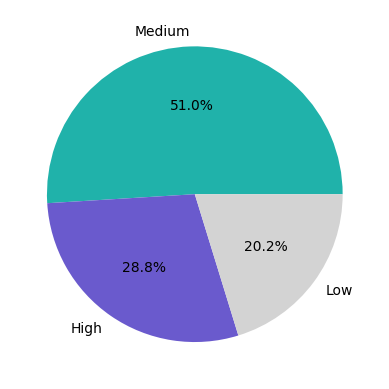

In [13]:
#Visualizing the distribution of Parental_Involvement
fig, ax = plt.subplots()
value_count = df['Parental_Involvement'].value_counts()

ax.pie(value_count, labels=value_count.index, autopct='%1.1f%%', colors=['lightseagreen', 'slateblue', 'lightgray'])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [14]:
distinct = df['Parental_Involvement'].nunique()
print(f'Distinct: {distinct}')

Distinct: 3


<h3>4.4. Access_to_Resources (Categorical variable)

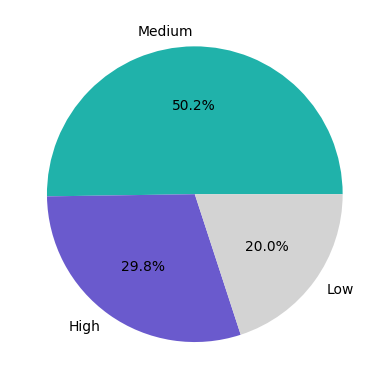

In [15]:
#Visualizing the distribution of Access_to_Resources
fig, ax = plt.subplots()
value_count = df['Access_to_Resources'].value_counts()

ax.pie(value_count, labels=value_count.index, autopct='%1.1f%%', colors=['lightseagreen', 'slateblue', 'lightgray'])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [16]:
distinct = df['Access_to_Resources'].nunique()
print(f'Distinct: {distinct}')

Distinct: 3


<h3>4.5. Sleep_Hours (Numeric variable)

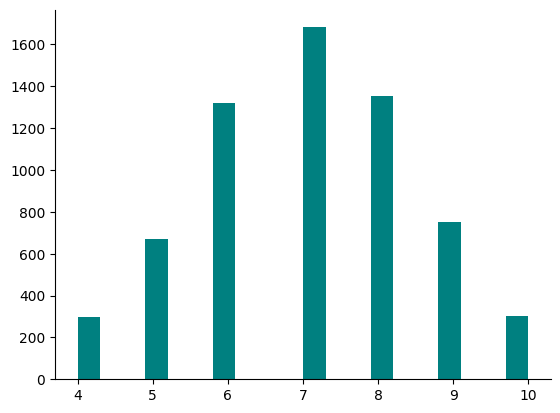

In [17]:
#Visualizing the distribution of Sleep_Hours
fig, ax = plt.subplots()

ax.hist(df['Sleep_Hours'], bins=20, color='teal')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [18]:
distinct = df['Sleep_Hours'].nunique()
zeros = df[df['Sleep_Hours'] == 0]['Sleep_Hours'].count()
negative = df[df['Sleep_Hours'] < 0]['Sleep_Hours'].count()
sum = df['Sleep_Hours'].sum()
kurtosis = df['Sleep_Hours'].kurtosis()
skewness  = df['Sleep_Hours'].skew()
variance = df['Sleep_Hours'].var()
print(f'Distinct: {distinct} Zeros: {zeros}  Negative {negative} Sum: {sum}  Kurtosis: {kurtosis}  Skewness: {skewness}  Variance: {variance}')

df['Sleep_Hours'].describe()

Distinct: 7 Zeros: 0  Negative 0 Sum: 44869  Kurtosis: -0.5037837556802347  Skewness: -0.02681432855871459  Variance: 2.155120439345439


count    6378.000000
mean        7.034964
std         1.468033
min         4.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: Sleep_Hours, dtype: float64

<h3>4.6. Extracurricular_Activities (Categorical variable)

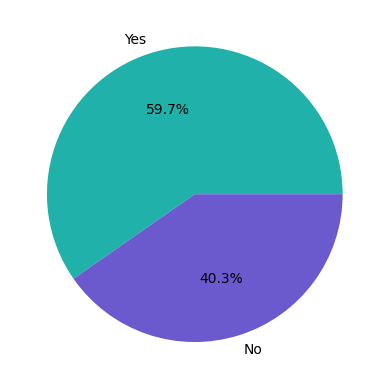

In [19]:
#Visualizing the distribution of Extracurricular_Activities
fig, ax = plt.subplots()
value_count = df['Extracurricular_Activities'].value_counts()

ax.pie(value_count, labels=value_count.index, autopct='%1.1f%%', colors=['lightseagreen', 'slateblue', 'lightgray'])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [20]:
distinct = df['Extracurricular_Activities'].nunique()
print(f'Distinct: {distinct}')

Distinct: 2


<h3>4.7. Previous_Scores (Numeric variable)

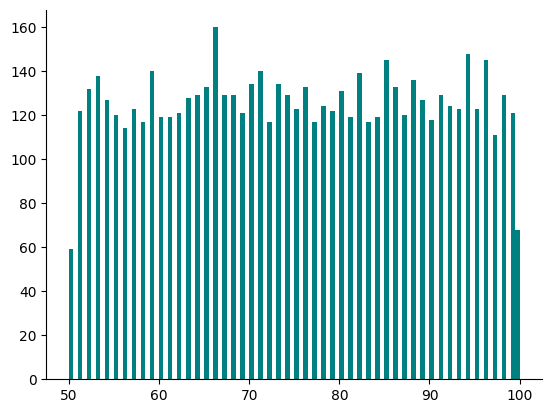

In [21]:
#Visualizing the distribution of Previous_Score
fig, ax = plt.subplots()

ax.hist(df['Previous_Scores'], bins=100, color='teal')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [22]:
distinct = df['Previous_Scores'].nunique()
zeros = df[df['Previous_Scores'] == 0]['Previous_Scores'].count()
negative = df[df['Previous_Scores'] < 0]['Previous_Scores'].count()
sum = df['Previous_Scores'].sum()
kurtosis = df['Previous_Scores'].kurtosis()
skewness  = df['Previous_Scores'].skew()
variance = df['Previous_Scores'].var()
print(f'Distinct: {distinct} Zeros: {zeros}  Negative {negative} Sum: {sum}  Kurtosis: {kurtosis}  Skewness: {skewness}  Variance: {variance}')

df['Previous_Scores'].describe()

Distinct: 51 Zeros: 0  Negative 0 Sum: 478772  Kurtosis: -1.1921974066389254  Skewness: -0.0013616826888904168  Variance: 207.37118996306745


count    6378.000000
mean       75.066165
std        14.400389
min        50.000000
25%        63.000000
50%        75.000000
75%        88.000000
max       100.000000
Name: Previous_Scores, dtype: float64

<h3>4.8. Motivation_Level (Categorical variable)

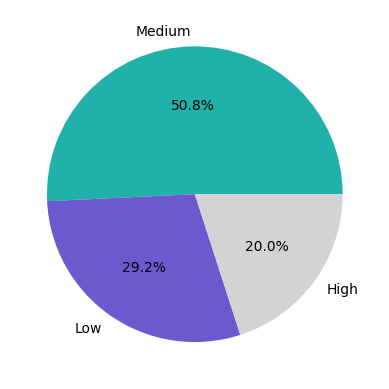

In [23]:
#Visualizing the distribution of Motivation_Level
fig, ax = plt.subplots()
value_count = df['Motivation_Level'].value_counts()

ax.pie(value_count, labels=value_count.index, autopct='%1.1f%%', colors=['lightseagreen', 'slateblue', 'lightgray'])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [24]:
distinct = df['Motivation_Level'].nunique()
print(f'Distinct: {distinct}')

Distinct: 3


<h3>4.9. Internet_Access (Categorical variable)

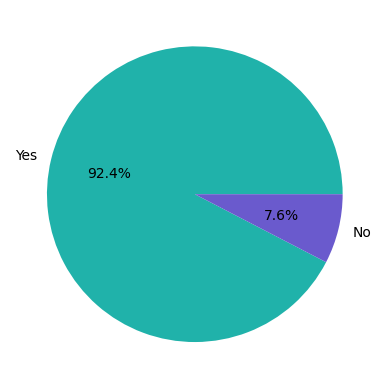

In [25]:
#Visualizing the distribution of Internet_Access
fig, ax = plt.subplots()
value_count = df['Internet_Access'].value_counts()

ax.pie(value_count, labels=value_count.index, autopct='%1.1f%%', colors=['lightseagreen', 'slateblue', 'lightgray'])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [26]:
distinct = df['Internet_Access'].nunique()
print(f'Distinct: {distinct}')

Distinct: 2


<h3>4.10. Tutoring_Sessions (Numeric variable )

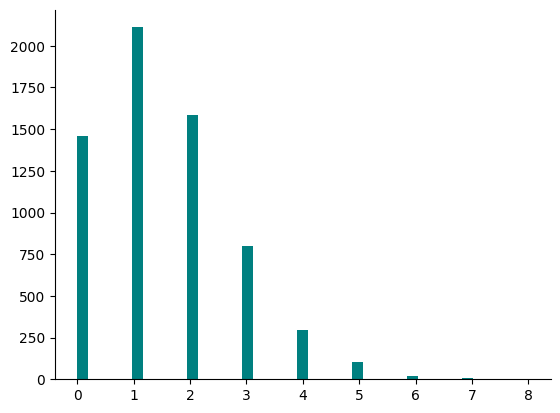

In [27]:
#Visualizing the distribution of Tutoring_Sessions
fig, ax = plt.subplots()

ax.hist(df['Tutoring_Sessions'], bins=41, color='teal')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [28]:
distinct = df['Tutoring_Sessions'].nunique()
zeros = df[df['Tutoring_Sessions'] == 0]['Tutoring_Sessions'].count()
negative = df[df['Tutoring_Sessions'] < 0]['Tutoring_Sessions'].count()
sum = df['Tutoring_Sessions'].sum()
kurtosis = df['Tutoring_Sessions'].kurtosis()
skewness  = df['Tutoring_Sessions'].skew()
variance = df['Tutoring_Sessions'].var()

print(f'Distinct: {distinct} Zeros: {zeros}  Negative {negative} Sum: {sum}  Kurtosis: {kurtosis}  Skewness: {skewness}  Variance: {variance}')

df['Tutoring_Sessions'].describe()

Distinct: 9 Zeros: 1458  Negative 0 Sum: 9537  Kurtosis: 0.6633967593211016  Skewness: 0.8252607117008907  Variance: 1.5227158365899558


count    6378.000000
mean        1.495296
std         1.233984
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: Tutoring_Sessions, dtype: float64

<h3>4.11. Family_Income (Categorical variable)

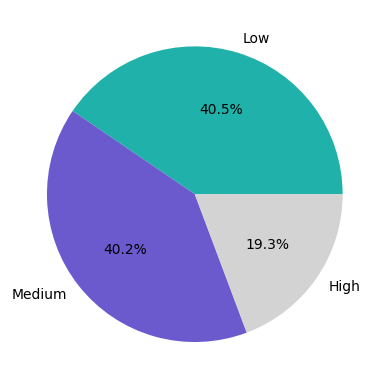

In [29]:
#Visualizing the distribution of Family_Income
fig, ax = plt.subplots()
value_count = df['Family_Income'].value_counts()

ax.pie(value_count, labels=value_count.index, autopct='%1.1f%%', colors=['lightseagreen', 'slateblue', 'lightgray'])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [30]:
distinct = df['Family_Income'].nunique()
print(f'Distinct: {distinct}')

Distinct: 3


<h3>4.12. School_Type (Categorical variable)

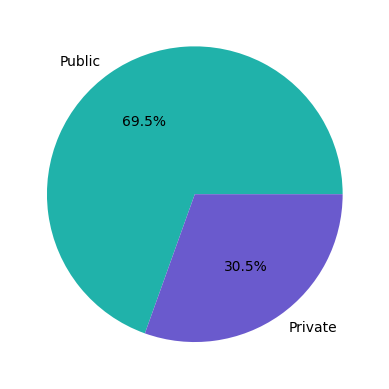

In [31]:
#Visualizing the distribution of School_Type
fig, ax = plt.subplots()
value_count = df['School_Type'].value_counts()

ax.pie(value_count, labels=value_count.index, autopct='%1.1f%%', colors=['lightseagreen', 'slateblue', 'lightgray'])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [32]:
distinct = df['School_Type'].nunique()
print(f'Distinct: {distinct}')

Distinct: 2


<h3>4.13. Peer_Influence (Categorical variable)

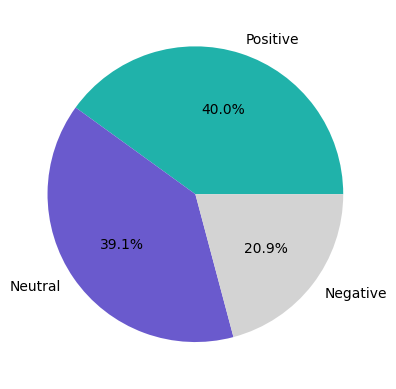

In [33]:
#Visualizing the distribution of Peer_Influence
fig, ax = plt.subplots()
value_count = df['Peer_Influence'].value_counts()

ax.pie(value_count, labels=value_count.index, autopct='%1.1f%%', colors=['lightseagreen', 'slateblue', 'lightgray'])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [34]:
distinct = df['Peer_Influence'].nunique()
print(f'Distinct: {distinct}')

Distinct: 3


<h3>4.14. Physical_Activity (Numeric variable)

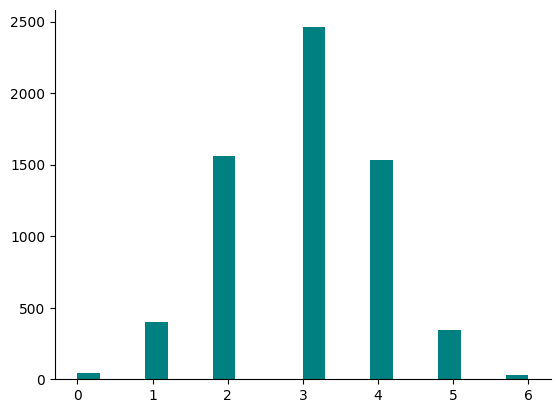

In [35]:
#Visualizing the distribution of Physical_Activity
fig, ax = plt.subplots()

ax.hist(df['Physical_Activity'], bins=20, color='teal')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [36]:
distinct = df['Physical_Activity'].nunique()
zeros = df[df['Physical_Activity'] == 0]['Physical_Activity'].count()
negative = df[df['Physical_Activity'] < 0]['Physical_Activity'].count()
sum = df['Physical_Activity'].sum()
kurtosis = df['Physical_Activity'].kurtosis()
skewness  = df['Physical_Activity'].skew()
variance = df['Physical_Activity'].var()
print(f'Distinct: {distinct} Zeros: {zeros}  Negative {negative} Sum: {sum}  Kurtosis: {kurtosis}  Skewness: {skewness}  Variance: {variance}')

df['Physical_Activity'].describe()

Distinct: 7 Zeros: 44  Negative 0 Sum: 18960  Kurtosis: -0.05357412809793827  Skewness: -0.03705482879464206  Variance: 1.0586879500368136


count    6378.000000
mean        2.972719
std         1.028926
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Physical_Activity, dtype: float64

<h3>4.15. Learning_Disabilities (Categorical variable)

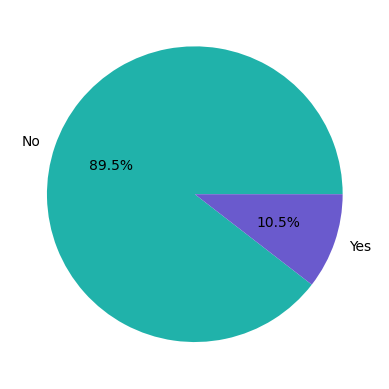

In [37]:
#Visualizing the distribution of Learning_Disabilities
fig, ax = plt.subplots()
value_count = df['Learning_Disabilities'].value_counts()

ax.pie(value_count, labels=value_count.index, autopct='%1.1f%%', colors=['lightseagreen', 'slateblue', 'lightgray'])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [38]:
distinct = df['Learning_Disabilities'].nunique()
print(f'Distinct: {distinct}')

Distinct: 2


<h3>4.16. Gender (Categorical variable)

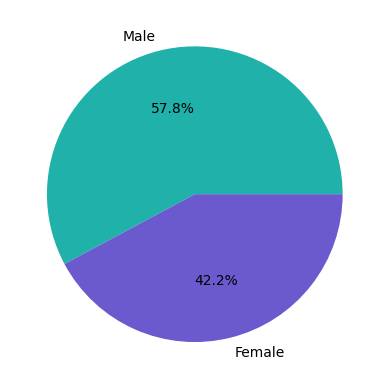

In [39]:
#Visualizing the distribution of Gender
fig, ax = plt.subplots()
value_count = df['Gender'].value_counts()

ax.pie(value_count, labels=value_count.index, autopct='%1.1f%%', colors=['lightseagreen', 'slateblue', 'lightgray'])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [40]:
distinct = df['Gender'].nunique()
print(f'Distinct: {distinct}')

Distinct: 2


<h3>4.17. Exam_Score (Numeric variable)

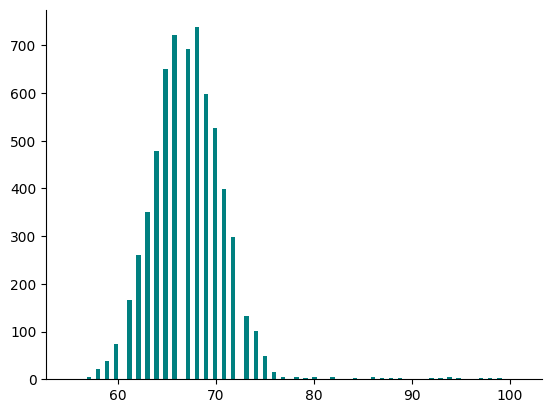

In [41]:
#Visualizing the distribution of Exam score 
fig, ax = plt.subplots()

ax.hist(df['Exam_Score'], bins=100, color='teal')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [42]:
distinct = df['Exam_Score'].nunique()
zeros = df[df['Exam_Score'] == 0]['Exam_Score'].count()
negative = df[df['Exam_Score'] < 0]['Exam_Score'].count()
sum = df['Exam_Score'].sum()
kurtosis = df['Exam_Score'].kurtosis()
skewness  = df['Exam_Score'].skew()
variance = df['Exam_Score'].var()
print(f'Distinct: {distinct} Zeros: {zeros}  Negative {negative} Sum: {sum}  Kurtosis: {kurtosis}  Skewness: {skewness}  Variance: {variance}')

df['Exam_Score'].describe()

Distinct: 45 Zeros: 0  Negative 0 Sum: 428934  Kurtosis: 10.656210797723903  Skewness: 1.6658308149706298  Variance: 15.32109086172364


count    6378.000000
mean       67.252117
std         3.914217
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

- The maximum exam score in reality is 100, but that in this dataset is 101. So I will delete all the data that have 'Exam Scores' higher than 100

In [43]:
df = df[df['Exam_Score'] <= 100]
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


- In general, there are no anomalies in attributes, except 'Exam Score'

<h1>II. Exploratory Data Analysis

<h2>1. Correlations

In [44]:
#Creating a new numerical attributes dataframe 
newdf = df.select_dtypes(include='number')

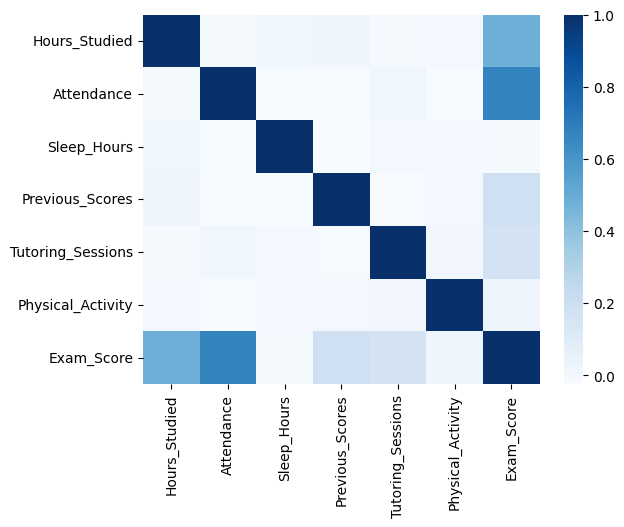

In [45]:
#I use the heatmap to visualize the correlation of numerical attributes
matrix = newdf.corr(method='spearman')

sns.heatmap(matrix, cmap='Blues')

plt.show()

- Attendance and Exam score have a high correlation, meaning that the more attendance, the higher the exam_score 
- Hours studied and Exam score have a moderate correlation
- Previous score, Tutoring sessions have a low correlation with Exam score

<h2>2. Hypothesis test 

- I want to find the relations of categorical variables and the significant characteristics of those
- Among many hypothesizes, below is some interesting insight I found 

<h3>2.1. School_Type and Access_to_Resources

In [46]:
#Testing if there is a significant accociation between School_Type and Access_to_Resources 
contingency_table = pd.crosstab(df['Access_to_Resources'], df['School_Type'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

if p < 0.05:
    print("There is a significant association between the attributes.")
else:
    print("There is no significant association between the attributes.")

There is a significant association between the attributes.


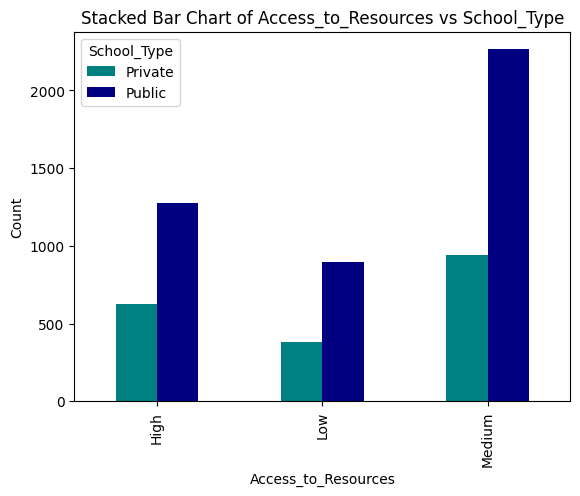

In [47]:
#Visualizing the distribution of Resource Accessing in two School types 
contingency_table.plot(kind='bar', color=['teal', 'navy'])
plt.title('Stacked Bar Chart of Access_to_Resources vs School_Type')
plt.xlabel('Access_to_Resources')
plt.ylabel('Count')
plt.legend(title='School_Type')
plt.show()

- The chance to access the learning resources is distributed equally in both private and public schools. Surprisingly, that of public schools is higher than public schools

<h3>2.2. Exam_Score and School_Type

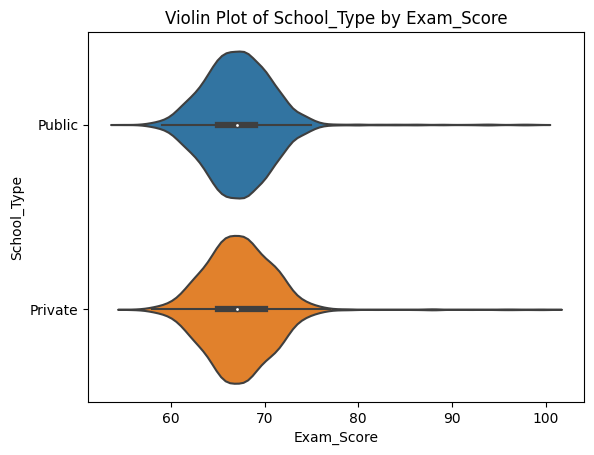

In [48]:
#Visualizing the distribution and the mean value of Exam scores in two School types 
sns.violinplot(x='Exam_Score', y='School_Type', data=df)
plt.xlabel('Exam_Score')
plt.ylabel('School_Type')
plt.title('Violin Plot of School_Type by Exam_Score')
plt.show()

In [49]:
#Calculating the average Exam scores of two School types
df.groupby('School_Type')['Exam_Score'].mean()

School_Type
Private    67.316358
Public     67.216332
Name: Exam_Score, dtype: float64

- Despite the limit in accessing resources, the average score of students in private school are higher than that of public school

<h3>2.3. Exam_Score and Distance_from_Home

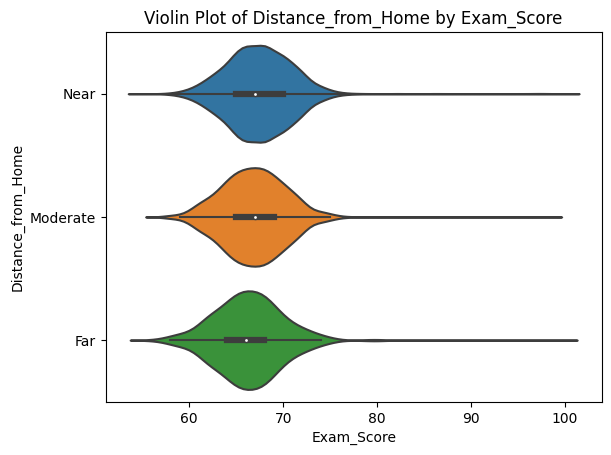

In [50]:
#Visualizing the distribution and the mean value of Exam scores in three Distances 
sns.violinplot(x='Exam_Score', y='Distance_from_Home', data=df)
plt.xlabel('Exam_Score')
plt.ylabel('Distance_from_Home')
plt.title('Violin Plot of Distance_from_Home by Exam_Score')
plt.show()

In [51]:
#Calculating the average Exam scores of three Distances 
df.groupby('Distance_from_Home')['Exam_Score'].mean()

Distance_from_Home
Far         66.498428
Moderate    66.969072
Near        67.513812
Name: Exam_Score, dtype: float64

- Distance from home to school is also a factor affecting exam scores. In detail, students who live near school have slightly higher average scores than those who live far from school

<h3>2.4. Exam_Score and Gender 

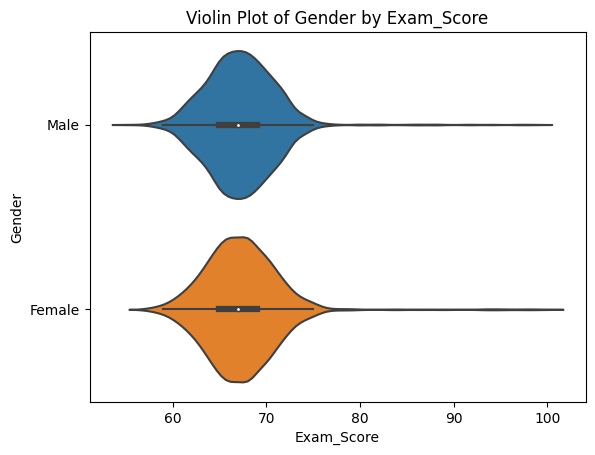

In [52]:
#Visualizing the distribution and the mean value of Exam scores in two Genders
sns.violinplot(x='Exam_Score', y='Gender', data=df)
plt.xlabel('Exam_Score')
plt.ylabel('Gender')
plt.title('Violin Plot of Gender by Exam_Score')
plt.show()

In [53]:
#Calculating the average Exam scores of two Genders
df.groupby('Gender')['Exam_Score'].mean()

Gender
Female    67.262179
Male      67.235629
Name: Exam_Score, dtype: float64

- The gap between average score of female and male is trivial, but it shows that the average exam score of female is higher than male 

<h3>2.5. The difference between the Previous score and the Exam score 

In [54]:
#Creating a new column, which is the difference between Previous score and Exam score 
df['Score_increase'] = df['Exam_Score'] - df['Previous_Scores']

/tmp/ipykernel_17/1178314074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score_increase'] = df['Exam_Score'] - df['Previous_Scores']


In [55]:
#Creating two data frames: one is increasing in score, another is decreasing in score 
df_increase = df[df['Score_increase'] > 0]
df_decrease = df[df['Score_increase'] <=0]

In [56]:
df_decrease['Score_increase'].describe()

count    4305.000000
mean      -15.757956
std         9.609085
min       -39.000000
25%       -24.000000
50%       -16.000000
75%        -8.000000
max         0.000000
Name: Score_increase, dtype: float64

In [57]:
#Calculate percentage
(df_decrease['Score_increase'].count() / df[['Score_increase']].count())*100

Score_increase    67.508233
dtype: float64

- There are 4305 students (67.5%), who have the decrease in the Exam score. In particular, one student lost 39 marks on the score.

In [58]:
df_increase['Score_increase'].describe()

count    2072.000000
mean        8.683398
std         5.452145
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        41.000000
Name: Score_increase, dtype: float64

In [59]:
#Calculate percentage
(df_increase['Score_increase'].count() / df[['Score_increase']].count())*100

Score_increase    32.491767
dtype: float64

- There are 2072 students (32.4%), who have the increase in the Exam score. In particular, one student gain 41 marks on the score.

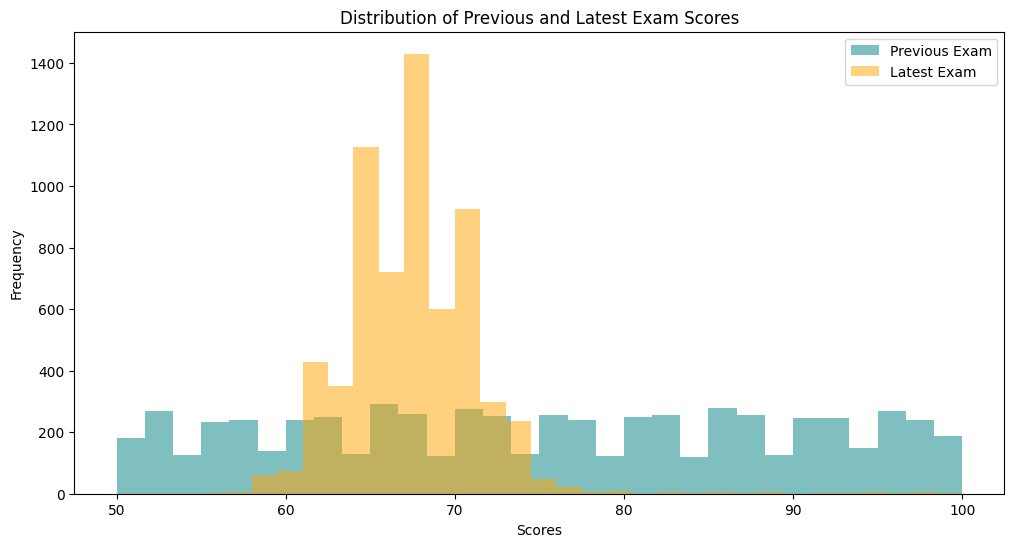

In [60]:
#Visualizing distributions of Previous score and Exam score 
plt.figure(figsize=(12, 6))

plt.hist(df['Previous_Scores'], bins=30, alpha=0.5, color='teal', label='Previous Exam')
plt.hist(df['Exam_Score'], bins=30, alpha=0.5, color='orange', label='Latest Exam')

plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Previous and Latest Exam Scores')
plt.legend()
plt.show()

<h1>III. Model building

- I will build Linear regression and Lasso regression model, and then evaluate which model (Linear regression, Lasso regression, or the combining of both these two) performs the best 

<h2>1. Get dummy variable 

In [61]:
#Converting categorical variables to dummy variables 
df_model = pd.get_dummies(df, dtype='float')
df_model

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Score_increase,Parental_Involvement_High,Parental_Involvement_Low,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,7,73,0,3,67,-6,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,19,64,8,59,2,4,61,2,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,24,98,7,91,2,4,74,-17,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,29,89,8,98,1,4,71,-27,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,19,92,6,65,3,4,70,5,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68,-8,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6603,23,76,8,81,3,2,69,-12,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6604,20,90,6,65,3,2,68,3,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
6605,10,86,6,91,2,3,68,-23,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


<h2>2. Train test split 

In [62]:
#Creating X and y dataset
X = df_model.drop('Exam_Score',axis=1)
y = df_model['Exam_Score']

In [63]:
#Splitting X and y into train set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>3. Linear regression

In [64]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.109e+29
Date:                Sat, 02 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:37:27   Log-Likelihood:             1.8029e+05
No. Observations:                6377   AIC:                        -3.605e+05
Df Residuals:                    6348   BIC:                        -3.603e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  -4.97e-15   5.85e-15     -0.850      0.396   -1.64e-14     6.5e-15
Hours_Studied                           9.92e-16   3.54e-16      2.804      0.005    2.98e-16    1.69e-15
Attendance                            -1.585e-15   2.09e-16     -7.593      0.000   -1.99e-15   -1.18e-15
Sleep_Hours                           -1.246e-15   1.09e-15     -1.140      0.254   -3.39e-15    8.96e-16
Previous_Scores                           1.0000   7.56e-16   1.32e+15      0.000       1.000       1.000
Tutoring_Sessions                      4.082e-15   1.36e-15      3.012      0.003    1.43e-15    6.74e-15
Physical_Activity                      2.151e-15   1.57e-15      1.371      0.170   -9.24e-16    5.23e-15
Score_increase                            1.0000   7.86e-16   1.27e+15      0.000       1.000       1.000
Parental_Involvement_High              1.292e-15   3.61e-15      0.358      0.720   -5.78e-15    8.36e-15
Parental_Involvement_Low              -1.335e-14   3.05e-15     -4.382      0.000   -1.93e-14   -7.38e-15
Parental_Involvement_Medium            -6.21e-16   2.86e-15     -0.217      0.828   -6.22e-15    4.98e-15
Access_to_Resources_High              -2.151e-16    3.6e-15     -0.060      0.952   -7.26e-15    6.83e-15
Access_to_Resources_Low               -1.728e-15   3.03e-15     -0.570      0.568   -7.67e-15    4.21e-15
Access_to_Resources_Medium            -3.022e-15    2.9e-15     -1.043      0.297    -8.7e-15    2.66e-15
Extracurricular_Activities_No          2.238e-16    3.2e-15      0.070      0.944   -6.05e-15     6.5e-15
Extracurricular_Activities_Yes        -3.832e-15   3.51e-15     -1.093      0.275   -1.07e-14    3.04e-15
Motivation_Level_High                 -4.141e-15   3.58e-15     -1.158      0.247   -1.11e-14    2.87e-15
Motivation_Level_Low                  -1.841e-15   2.91e-15     -0.632      0.527   -7.55e-15    3.87e-15
Motivation_Level_Medium                5.249e-15   2.89e-15      1.819      0.069   -4.07e-16    1.09e-14
Internet_Access_No                    -1.843e-15   4.16e-15     -0.444      0.657   -9.99e-15     6.3e-15
Internet_Access_Yes                    2.073e-15    4.3e-15      0.482      0.630   -6.35e-15    1.05e-14
Family_Income_High                     7.485e-15   3.57e-15      2.096      0.036    4.85e-16    1.45e-14
Family_Income_Low                     -3.626e-15   2.76e-15     -1.314      0.189   -9.03e-15    1.78e-15
Family_Income_Medium                   -4.21e-15   2.97e-15     -1.420      0.156      -1e-14     1.6e-15
Teacher_Quality_High                  -3.568e-15   3.51e-15     -1.018      0.309   -1.04e-14    3.31e-15
Teacher_Quality_Low                    4.028e-15   3.99e-15      1.009      0.313    -3.8e-15    1.19e-14
Teacher_Q

In [65]:
#Fitting X_train, y_train into Lineaer regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [66]:
#Evaluating Linear regression by calculating R-squared through cross-validation
np.mean(cross_val_score(linear_reg, X_train, y_train, scoring='r2', cv=3))

1.0

<h2>4. Lasso Regression

In [67]:
#Fitting X_train, y_train into Lasso regression model
lm_l = Lasso()
lm_l.fit(X_train,y_train)

Lasso()

In [68]:
#Evaluating Lasso regression by calculating R-squared through cross-validation
np.mean(cross_val_score(lm_l, X_train, y_train, scoring='r2', cv=3))

0.9748112185648923

<H2>5. Combining models

- I will use R-squared as a metric to evaluate the efficiency of models

In [69]:
#Calculating y predict value 
tpred_lm = linear_reg.predict(X_test)
tpred_lml = lm_l.predict(X_test)

In [70]:
#R-squared score of Lasso regression model
r2_score(y_test, tpred_lml)

0.9750796114754511

In [71]:
#R-squared score of Linear regression model
r2_score(y_test, tpred_lm)

1.0

In [72]:
#R-squared score of combined Linear regression model and Lasso regression model
r2_score(y_test,(tpred_lm + tpred_lml)/2)

0.9937699028688631

- R-squared score of Linear regression model is the highest (0.73)
- Removing outliers will result in a higher R-squared score, but as I mentioned, I'm not sure what caused outliers, so I still keep those in model